# Introduction to Jupyter

What are Jupyter notebooks? This is a critical one to start with so you've got a good idea of what they are! So following along with the next few notebooks before you do anything else!

## Running Tutorials

Jupyter notebooks are documents that combine Python code, rich text, and additional code (such as Bash), organized into executable blocks. Notebooks allow users to run blocks out of order and multiple times, giving greater control over what's being run than a Python script. To run these notebooks, you'll need to install the Jupyter Notebook application (see [Installing ChipWhisperer](https://chipwhisperer.readthedocs.io/en/latest/index.html#install)), which also includes file browser and text editor capabilities.

Below is an example of a Python block. First select the block by clicking on it. A green or blue border should appear around the block, indicating that the block is selected. Next, hit the `>| Run` button on the toolbar at the top of your screen. The next block should now be highlighted.

In [1]:
i = 0

State is kept between Python blocks. Try running the next block multiple times to see how the printed number changes:

In [2]:
i += 1
print(i)

1


Notebooks also allow special blocks to be run. Two special blocks used throughout the ChipWhisperer tutorials are `bash` blocks, which allow bash commands to be run (note: if you're not using a bash-like terminal to run Jupyter, these blocks won't work for you):

In [2]:
import sys
print(sys.executable)

C:\Users\Samuel\PycharmProjects\chipwhisperer-jupyter\.venv\Scripts\python.exe


In [1]:
%%bash
echo "Test bash"
i=0
for j in *; do let "i=i+1"; done
echo "there are" $i "files/folders in this directory"

Test bash
there are 18 files/folders in this directory


And `run` blocks, which run other notebooks:

In [4]:
%run "Helper_Scripts/Test_Run.ipynb"

Hi, I'm another Notebook!


Code blocks can also be edited by clicking within the code portion of the block (the grey area). You can tell if you're in edit mode by the presence of a green border around the block. If you're not in edit mode, the border will be blue instead.

## Plotting with matplotlib

First off - plotting with matplotlib. This is the easiest to use, as you can plot stuff with `plt.plot()`, and also set a colour as in the following:

    import matplotlib.pylab as plt
    plt.plot([1,2,2,4,5], 'r')
    
If you don't see the result, add the following at the end:

    plt.show()
    

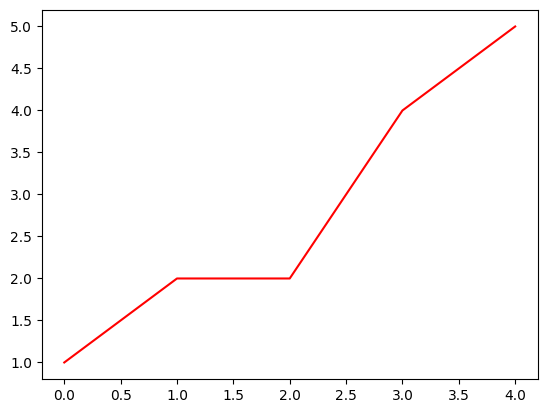

In [5]:
import matplotlib.pylab as plt
plt.plot([1,2,2,4,5], 'r')
plt.show()

Often it's nice to have an interactive graph. We can do that with a special *magic* at the start of our notebook, which looks like this:

    %matplotlib notebook
    import matplotlib.pylab as plt
    
    plt.plot([1,2,2,4,5], 'r')
    plt.plot([3,1,5,5,7], 'g')
    
Give that a shot right here:

In [2]:
!pip install ipython ipympl ipywidgets
!pip install --upgrade ipython

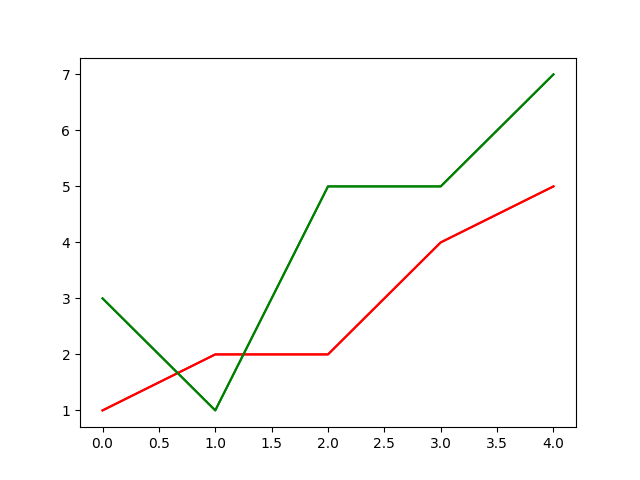

In [2]:
%matplotlib ipympl
import matplotlib.pylab as plt
    
plt.plot([1,2,2,4,5], 'r')
plt.plot([3,1,5,5,7], 'g')
plt.show()

Another feature you'll often want is an ability to run plot commands from inside some loop - for example plotting data in real-time.

This can be a little slow - but is a pretty powerful tool. This is easily done by using the interactive plot (previously) in one cell, then doing the update plot in another cell.

You'll likely need to add a `fig.canvas.draw()` inside the loop to force the update. The following shows an example of plotting a series of dots (how exciting!) with a delay between each plotting. Note that the figure is generated in the first block, and the actual update happens in the second block.

In [8]:
%matplotlib notebook
import matplotlib.pylab as plt
fig = plt.figure()

<IPython.core.display.Javascript object>

In [9]:
import time

for i in range(0, 10):
    time.sleep(1)
    
    ## to update the plot:
    plt.plot(-5, i, '.')
    fig.canvas.draw()

## Widgets

Another super-useful feature is called "widgets", which are a way of adding interactive elements to your notebook. They are great for providing status feedback (such as number of traces captured) in a loop.

See the [Widget Documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html) for complete details of all the widgets you might want. You can easily just display the widgets as below:

In [10]:
import ipywidgets as widgets

slider_widget = widgets.FloatSlider( value=0.0,
                                     min=0,
                                     max=1.0,
                                     step=0.01,
                                     description="Doneness:",
                                     disabled=True,
                                     continuous_update=False,
                                     orientation='horizontal',
                                     readout=True,
                                     readout_format='.01f')
                                            
status_widget = widgets.IntText(     value=0,
                                     description="Iteration No",
                                     disabled=True)

display(slider_widget)
display(status_widget)

FloatSlider(value=0.0, continuous_update=False, description='Doneness:', disabled=True, max=1.0, readout_forma…

IntText(value=0, description='Iteration No', disabled=True)

In [11]:
import time
for i in range(0, 12):
    slider_widget.value = i / 12.0
    status_widget.value = i
    time.sleep(0.5)

## Completion Hints

Quick! What does the numpy `np.argmax()` do and what are it's arguments?

Luckily we can use some hinting features to tell us this. To try them out:

1. Run the block below - because you don't want to continue to the next block, suggest using `Control-Enter` (you'll get an error - we have no argument!)
2. Put your cursor inside the `()`, and press `Tab`+`Shift`. You shold get a pop-up hint window like show here:

<img src="img/typehint.png" alt="Example Hinting" width="450"/>

Note this works if your cursor is anywhere on the function handle, so you can pretty quickly get this working. The only real requirement is you need to actually run the `import` statement first. Try getting the signature for `np.ndarray` for example by changing to that function first - and again press `Tab-Shift` to get the signature.

In [12]:
import numpy as np
np.argmax()

TypeError: argmax() missing 1 required positional argument: 'a'

## Completing Courses

ChipWhisperer tutorials that are part of the 'courses' are designed to walk you through various topics. These courses have supplementary material on ChipWhisperer.io that you might enjoy for a deeper dive, but are also designed to work stand-alone to show various features of ChipWhisperer. The tutorials also can be used with other reference books or material on side-channel power analysis and fault injection.

In [ ]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
CRYPTO_TARGET = 'NONE'

These are typically used as follows in the tutorial:

* `SCOPETYPE` - Indicates the capture hardware to use. If you have a ChipWhisperer Lite or Pro, use `'OPENADC'`. If you have a ChipWhisperer Nano, use `'CWNANO'`.
* `PLATFORM` - Selects the target we're attacking. As of ChipWhisperer v5.1.0, tutorials only support at most `'CWLITEARM'` (STM32F3 target), `'CWLITEXMEGA'` (XMEGA target), and `'CWNANO'` (Nano STM32F0 target).
* `CRYPTO_TARGET` - Selects the cryptographic library to use on the target. If unsure, use `'AVRCRYPTOLIB'` for the XMEGA target and `'TINYAES128C'` otherwise. Tutorials that don't have this block or use `'NONE'` don't require a crypto library.

The parameter blocks should always be the first one run during a tutorial.

## User Folder

New in ChipWhisperer 5.7.0 is the `user` folder. This is a special folder that is ignored by git. This means you can make as many changes within that folder without having to worry about colliding with updates. You may find it helpful to copy the folders in `courses` into that folder. If you do so, make sure the relative paths still line up. For example, you should have `user/sca101`, not `user/courses/sca101`.

### Further Reading

If you'd like to learn more about Jupyter Notebooks before diving into the rest of the tutorials, the following links are recommended:

* [Jupyter Notebook documentation](https://jupyter-notebook.readthedocs.io/en/stable/)
* [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)